<a href="https://colab.research.google.com/github/szh141/colab/blob/main/Imaris_cell_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imaris Cell package
comparing renin,vessel,nerve by individual ML segmented region

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import filters,feature,data,color,measure

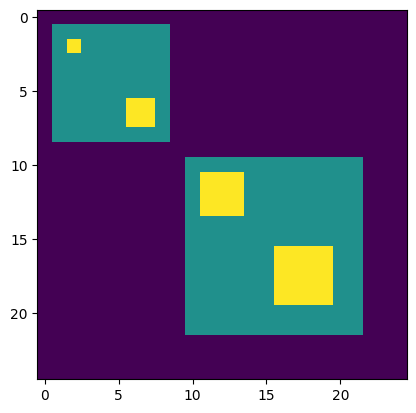

In [27]:
a = np.zeros((25,25))
a[1:9,1:9]=1
a[2:3,2:3]=2
a[6:8,6:8]=2

a[10:22,10:22]=1
a[11:14,11:14]=2
a[16:20,16:20]=2

plt.imshow(a)

[0 1 2]
[0 3 4 5 6]


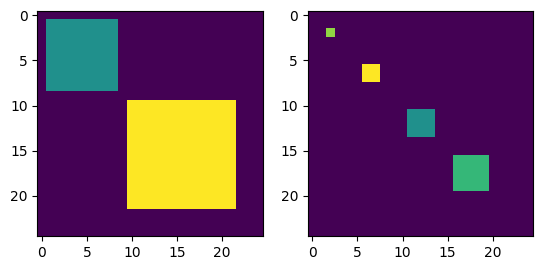

In [31]:
mask_big = a>0
mask_1=measure.label(mask_big)

mask_small = a>1
mask_2=measure.label(mask_small)

mask_2[mask_2==1]=5
mask_2[mask_2==2]=6

plt.subplot(121)
plt.imshow(mask_1)
print(np.unique(mask_1))
plt.subplot(122)
plt.imshow(mask_2)
print(np.unique(mask_2))


In [36]:
props = measure.regionprops_table(mask_2,intensity_image=mask_1,
                                  properties=['label','area','intensity_max','bbox'])

In [37]:
import pandas as pd
df = pd.DataFrame(props)
df.head()

,label,area,intensity_max,bbox-0,bbox-1,bbox-2,bbox-3
0,3,9,2.0,11,11,14,14
1,4,16,2.0,16,16,20,20
2,5,1,1.0,2,2,3,3
3,6,4,1.0,6,6,8,8


3D bbox, has 8 vertexes
calculate the longest axis
